
# Examen Final

* Finalización: 11am


El examen es a libro abierto. 
* Se permite googlear.
Será considerado cómo descalificación y caerá sobre el alumno todo el peso del reglamento académico el caso de que el alumno:
* Use una llms (Bard, chatgpt, bing,etc)
* Se mensajee con otros alumnos



# Ejercicio 1: Regresión (30pts)
**dataset**: "ventas_de_autos.csv"
**link**:  https://drive.google.com/file/d/1Uy4I3xus9Rh2MlhEkLNFo10FKuSNKdTQ/view?usp=sharing

*Contexto:
En un trabajo te piden predecir las ventas en función a las distintas variables que los ingenieros de datos pudieron recolectar. Se espera una interpretación clara sobre las razones que determinan las ventas de un auto.*

1. Entrene una regresión con statsmodels. (5pts/30pts)
2. ¿Hay que considerar una variable que tiene un p-valor menor a 0.5?  (5pts/30pts)
3. ¿Que variable de tu regresión tiene un p-valor menor a 0.5? (2.5pts/30pts)
4. Manteniendo todas las variables constantes. ¿Cual es el aumento esperado de las ventas si el auto es de japón?  (5pts/30pts)
5. Manteniendo todas las variables constantes. ¿Cual es el aumento o disminución esperada de las ventas si aumenta en 1 la edad del auto? (5pts/30pts)
6. Prediga las ventas para un auto que tiene 116mil de kilometraje, el pais de origen es Estados Unidos, el Ranking en revistas de auto es de 150, el precio de mercado libre es de  50.000 y la fecha_de_elaboracion es de 2015 (7.5pts/30pts)

# Ejercicio 2: Clasificación. (40pts)
**dataset**: "leads_a_clientes.csv"
**link** https://drive.google.com/file/d/1v0o7z70v06NIaBbmo6kwXdZX6pPf8Bdr/view?usp=sharing

*Contexto:
Se refieren cómo leads a aquellos clientes que son los prospectos, esto es, potenciales clientes que luego deciden si convertirse o no en clientes. Tu hipotesis es que dada la interacción del cliente con la empresa y sus caracteristicas, hay clientes con mayor probabilidad de conversión que otros.*

1. Calcular la variable edad (2pts/40pts)
2. Graficar boxplot de la variable edad (2pts/40pts)
3. Graficar boxplot de la variable  ingreso_estimado en funcion de la variable categoria.(2pts/40pts)
4. ¿A que conclusión llega en base al anterior boxplot? En base a esa explicación decida si debe sacar una categoria o no. (8pts/40pts)
5. Grafique la variable cantidad_mensajes en funcion de si es cliente o no. (2pts/40pts)
4. ¿Que conclusiones llega segun este gráfico? Que hipotesis tiene? (4pts/40pts)
5. Separar train y test (1pts/40pts)
6. Entrene un arbol de decision (1pts/40pts)
7. Prediga en test  (4pts/40pts)
8. Grafique una matriz de confusión de test. (2pts/40pts)
9. Grafique un árbol. (4pts/40pts)
10. ¿Cual es la variable del root node? ¿Que significa? Explique teniendo en cuenta el criterio de Gini Index (8pts/40pts)

# Ejercicio 3: ROI (30pts)
**datos**: Resultado del ejercicio anterior.

Teniendo en cuenta los resultados de la matriz de confusión en test del ejercicio anterior.

*Contexto: Tus hipotesis fueron demostradas dado el analisis de los puntos anteriores. Es decir, demostraste que esas variables eran consistentes con predecir que cliente va a convertir o no. Por lo tanto dado tu algoritmo la idea es generar una acción de la empresa. Hacer publicidad a los leads que predecis cómo clientes. Para esto debes responder:*

1. Si una publicidad cuesta 10 ¿Cuanto sería la publicidad desperdiciada?  (10pts/30pts)
2. Mirando la matriz de confusión cálcule el ROI del modelo suponiendo que la ganancia de un cliente por convertir es de 150, el costo de publicidad es de 10 y la inversión total corresponde al costo de publicidad total. (20pts/30pts)


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
ventas = pd.read_csv('ventas_de_autos.csv', sep = '|')

In [117]:
ventas

,Unnamed: 0,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05
5,5,130949.352048,Corea del Sur,266,25562.497178,2018-08-04,4.816859e+05
6,6,90329.506196,China,186,37054.228679,2014-11-06,7.039471e+05
7,7,178895.735153,Estados Unidos,128,73181.893287,2015-08-08,1.423705e+06
8,8,192914.238298,Alemania,33,41496.499294,2022-09-17,7.999540e+05
9,9,79771.096171,Francia,32,52914.442052,2016-10-11,1.038587e+06


In [118]:
ventas = ventas.drop(columns = ['Unnamed: 0'])

In [119]:
ventas.isna().sum()

Kilometraje                    0
Pais de Origen                 0
Ranking en revistas de auto    0
precio en mercado libre        0
fecha_de_elaboracion           0
ventas                         0
dtype: int64

In [120]:
ventas.dtypes

Kilometraje                    float64
Pais de Origen                  object
Ranking en revistas de auto      int64
precio en mercado libre        float64
fecha_de_elaboracion            object
ventas                         float64
dtype: object

In [121]:
ventas['fecha_de_elaboracion'] = pd.to_datetime(ventas['fecha_de_elaboracion'])
ventas["hoy"] = "2023-12-14"
ventas["hoy"] = pd.to_datetime(ventas["hoy"])
ventas['antiguedad'] = (ventas["hoy"] - ventas['fecha_de_elaboracion']).dt.days//365
ventas = ventas[ventas['antiguedad'] <= 90]

In [122]:
ventas.columns = ventas.columns.str.replace(' ', '_')

In [123]:
features = ['Kilometraje', 'Ranking_en_revistas_de_auto', 'precio_en_mercado_libre', 'C(Pais_de_Origen)', 'antiguedad']

In [124]:
formula = 'ventas ~ ' + ' + '.join(features)

In [125]:
formula

'ventas ~ Kilometraje + Ranking_en_revistas_de_auto + precio_en_mercado_libre + C(Pais_de_Origen) + antiguedad'

In [126]:
import statsmodels.formula.api as smf

In [127]:
model = smf.ols(formula = formula, data = ventas).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3263.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.25e-07
Time:                        10:47:49   Log-Likelihood:                -147.82
No. Observations:                  15   AIC:                             317.6
Df Residuals:                       4   BIC:                             325.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\Users\tomyw\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Las variables con valor p menor a 0.5 son las que sirven para el modelo

### Tienen menos de 0.5 las no relacionadas al pais de origen excepto los chinos

### En caso de ser japones habria una reduccion de 5000

### Ante un aumento en la edad o antiguedad aumentaria en 1364

In [128]:
clientes = pd.read_csv('leads_a_clientes.csv')

In [129]:
clientes

,Unnamed: 0,fecha de nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente
0,0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí
1,1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No
2,2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí
3,3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí
4,4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No
...,...,...,...,...,...,...,...,...
2995,2995,1962-11-28 12:27:39.148023,14.109121,351.827087,36.691961,213.400237,Categoria B,No
2996,2996,1962-11-28 12:27:39.148023,21.890879,494.859133,53.525986,359.351304,Categoria B,No
2997,2997,1980-11-23 12:27:39.148023,50.109121,488.597332,44.621153,352.961711,Categoria A,No
2998,2998,1982-11-23 12:27:39.148023,26.109121,368.592515,53.934444,230.507817,Categoria A,No


In [130]:
clientes = clientes.drop(columns = ['Unnamed: 0'])

In [131]:
clientes["hoy"] = "2023-12-14"

In [132]:
clientes["hoy"] = pd.to_datetime(clientes["hoy"])

In [133]:
clientes['fecha de nacimiento'] = pd.to_datetime(clientes['fecha de nacimiento'])

In [134]:
clientes['edad'] = (clientes["hoy"] - clientes['fecha de nacimiento']).dt.days//365
clientes = clientes[clientes['edad'] <= 100]

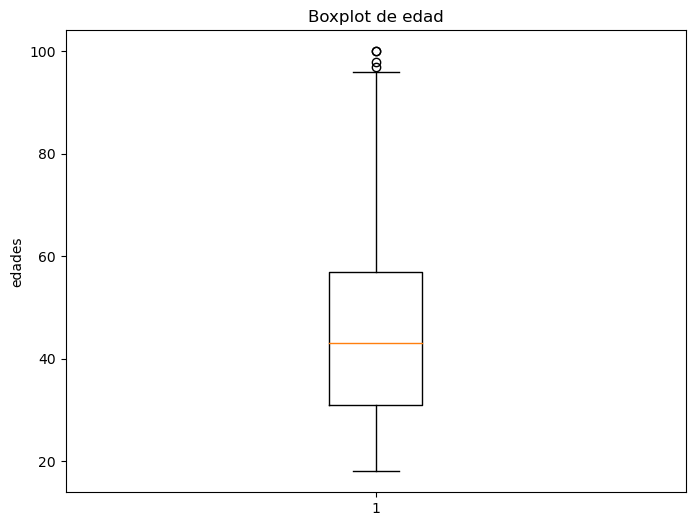

In [135]:
plt.figure(figsize=(8, 6))
plt.boxplot(clientes['edad'])
plt.title('Boxplot de edad')
plt.ylabel('edades')
plt.show()

<Axes: xlabel='categoria', ylabel='ingreso_estimado'>

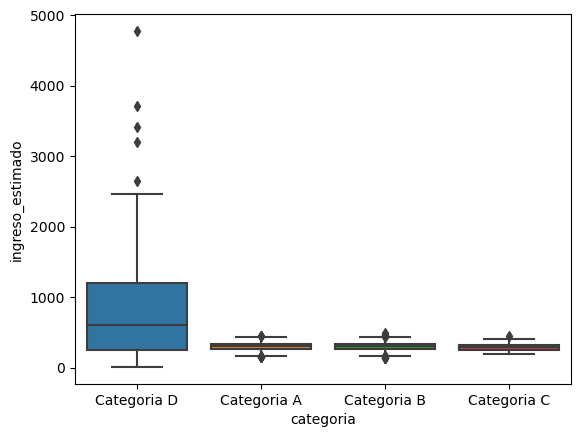

In [136]:
sns.boxplot(x = clientes['categoria'], y = clientes['ingreso_estimado'])

In [137]:
group1 = clientes[clientes['categoria'] == "Categoria D"]["ingreso_estimado"]
group2 = clientes[clientes['categoria'] != "Categoria D"]["ingreso_estimado"]

In [138]:
from scipy.stats import ttest_ind

In [139]:
t_stat, p_value = ttest_ind(group1, group2)
if p_value < 0.05:
  print("Rechazar la hipótesis nula. Hay una diferencia significativa del ingreso de la categoria D con las demas.")
else:
  print("No rechazar la hipótesis nula.")

Rechazar la hipótesis nula. Hay una diferencia significativa del ingreso de la categoria D con las demas.


In [140]:
clientes = clientes[clientes['categoria'] != "Categoria D"]

<Axes: xlabel='cliente', ylabel='cantidad_mensajes'>

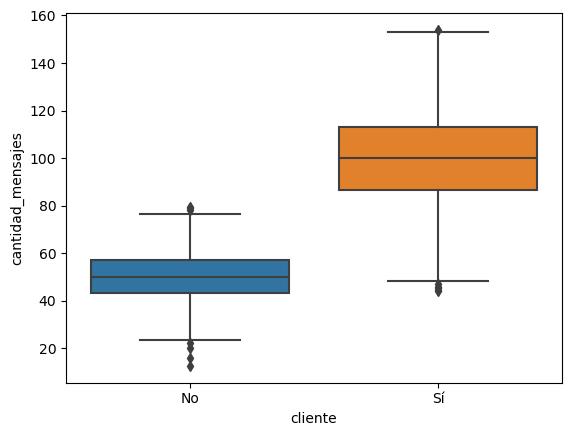

In [141]:
sns.boxplot(x = clientes['cliente'], y = clientes['cantidad_mensajes'])

### Podemos decir que mientras mas mensajes envia, osea mas activo es, mayor es la probabilidad de que sea un cliente

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [143]:
clientes['cliente'] = clientes['cliente'].map(lambda x: 0 if x == 'No' else 1)

In [144]:
clientes = pd.get_dummies(clientes, 'categoria')

In [145]:
clientes.columns

Index(['fecha de nacimiento', 'clicks_en_web', 'puntaje', 'cantidad_mensajes',
       'ingreso_estimado', 'cliente', 'hoy', 'edad', 'categoria_Categoria A',
       'categoria_Categoria B', 'categoria_Categoria C'],
      dtype='object')

In [146]:
X = clientes[['clicks_en_web', 'puntaje', 'cantidad_mensajes', 'ingreso_estimado', 'categoria_Categoria A','categoria_Categoria B', 'categoria_Categoria C', 'edad']]
y = clientes['cliente']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [148]:
y_pred = tree.predict(X_test)

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

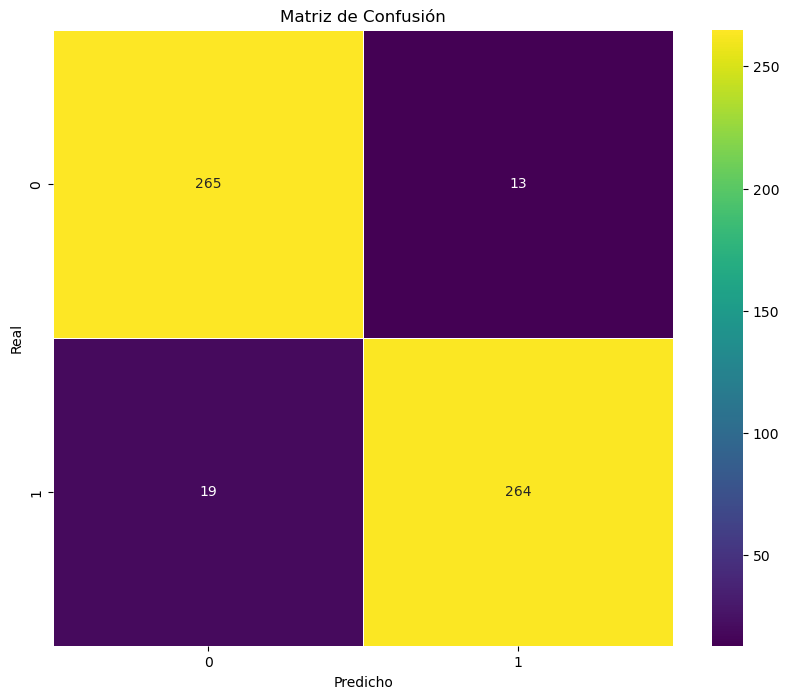

In [150]:
conf_matrix = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [151]:
from sklearn.tree import export_graphviz
import graphviz

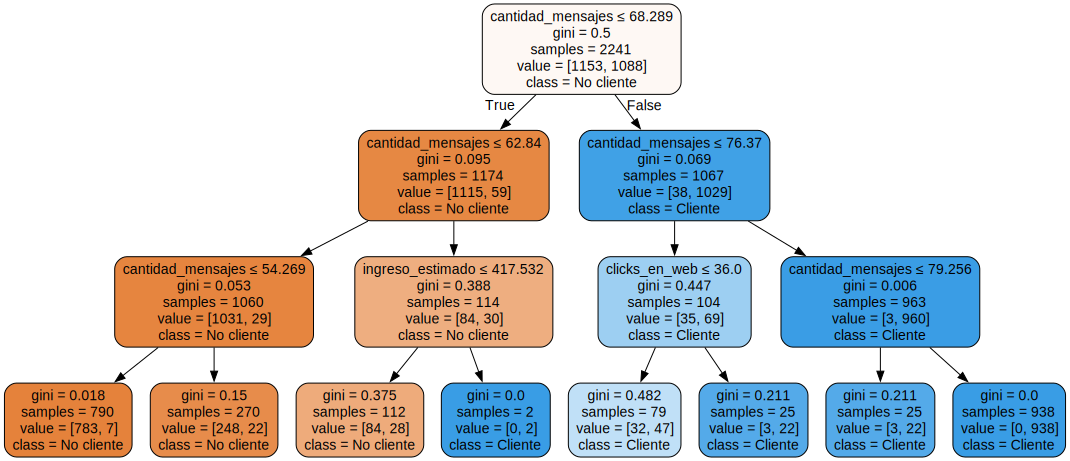

In [152]:
features = X.columns
targets = ["No cliente","Cliente"]
data = export_graphviz(tree, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

### La variable del root node es la cantidad de mensajes, esto es porque es la variable que mas separa, ya que mientras mas alto es el gini mas impuerzas tiene.

In [153]:
FP = 13
TP = 264
TN = 265
FN = 19

In [154]:
print(f'El costo de publicidad desperdiciado fue de {10*FP}')

El costo de publicidad desperdiciado fue de 130


In [155]:
print(f'El ROI esperado es de: {((TP*150)- ((TP+FP)*10))/(TP+FP)*10}')

El ROI esperado es de: 1329.6028880866427
